### CNN for classifying MNIST dataset on GPU
#### Also plot loss and accuracy curves and display some sample images along with classification results

Implementation Steps:
* Import Libraries: Import necessary libraries including PyTorch and matplotlib.
* Define CNN Model: Create a simple CNN model.
* Load Data: Load and preprocess the MNIST dataset.
* Train Model: Train the model and record the loss and accuracy.
* Plot Results: Plot the loss and accuracy curves.
* Display Sample Predictions: Show some sample images along with their predicted labels.




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1) # 28 x 28 --> z=(H - f + 2p)/s + 1 ==> 14 x 14
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # 7 x 7
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128) # 28//2//2
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) # flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2. Load Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# 3. Train Model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracies.append(100 * correct / total)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {100 * correct/total:.2f}%')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16459051.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 519612.46it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3829738.64it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8779045.52it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

cuda
Epoch [1/10], Loss: 0.1365, Train Accuracy: 98.74%
Epoch [2/10], Loss: 0.0436, Train Accuracy: 98.49%
Epoch [3/10], Loss: 0.0292, Train Accuracy: 98.88%
Epoch [4/10], Loss: 0.0200, Train Accuracy: 98.98%
Epoch [5/10], Loss: 0.0163, Train Accuracy: 99.07%
Epoch [6/10], Loss: 0.0121, Train Accuracy: 99.19%
Epoch [7/10], Loss: 0.0105, Train Accuracy: 98.83%
Epoch [8/10], Loss: 0.0081, Train Accuracy: 99.14%
Epoch [9/10], Loss: 0.0062, Train Accuracy: 99.28%
Epoch [10/10], Loss: 0.0065, Train Accuracy: 99.07%


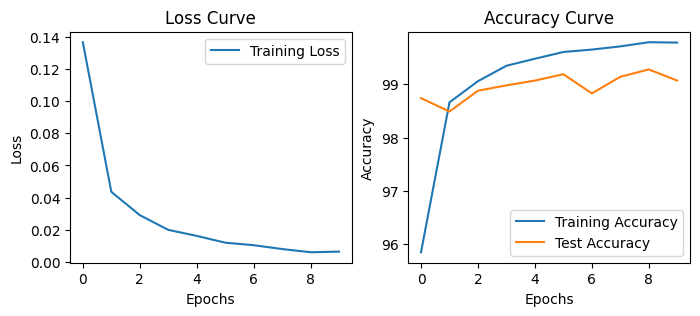

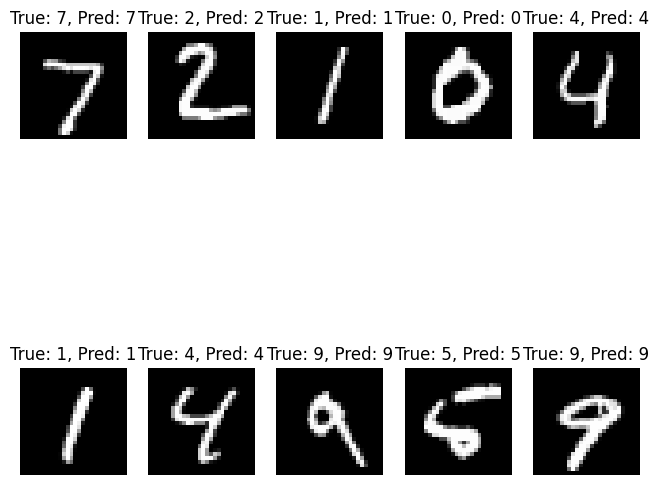

In [ ]:
# 4. Plot Loss and Accuracy Curves
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

# 5. Display Sample Predictions
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

images = images.cpu().numpy()
labels = labels.cpu().numpy()
predicted = predicted.cpu().numpy()

fig, axes = plt.subplots(2, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'True: {labels[i]}, Pred: {predicted[i]}')
    ax.axis('off')
plt.show()
